LA06 kelompok 5

*   Kalyani Jeslyn Lim
*   Rasya Nuhaifa Movia
*   Regina Lo



Link video: https://youtu.be/RDB9D1B33fc

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk

In [ ]:
df = pd.read_csv("email_spam.csv")
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [ ]:
#we have to change the type from spam and not spam to binary. not spam is 0, spam is 1
df['type'] = df['type'].map({'not spam': 0, 'spam': 1})
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1


In [ ]:
#cleaning the text
from bs4 import BeautifulSoup
def cleaning(text):
  text = text.lower() #lowercase the text
  text = BeautifulSoup(text, "html.parser").get_text() #to remove hyperlink in email and replace it with the word which it is linked to
  text = re.sub(r"\\n|\\t|\n|\t", " ",text) #erase newline, tab, and other escape sequence
  text = re.sub(r"[^a-zA-Z\s]", "", text) #keep only alphabet characters
  text = re.sub(r"[^\w\s]", "", text) #erase every non alphanumeric and space characters
  text = re.sub(r"\s+", " ", text) #remove excessive space
  return text

df['title_cleaned'] = df['title'].apply(cleaning)
df['text_cleaned'] = df['text'].apply(cleaning)
df.head()

,title,text,type,title_cleaned,text_cleaned
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",1,the secrets to success,hi james have you claim your complimentary gif...
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",0,you earned gcloot points,alttext congratulations you just earned you c...
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",0,your github launch code,heres your github launch code mortyj an octoca...
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",0,the virtual reward center re clarifications,hello thank you for contacting the virtual rew...
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",1,mlb expert inside plus everything you need to...,hey prachanda rawal todays newsletter is jampa...


In [ ]:
#split the text
from sklearn.model_selection import train_test_split

X_title = df['title_cleaned']
X_text = df['text_cleaned']
Y = df['type']

X_title_train, X_title_test, X_text_train, X_text_test, Y_train, Y_test = train_test_split(X_title, X_text, Y, test_size = 0.3, random_state = 42, stratify = df['type'])

print("X title train")
print(X_title_train.head())
print("X text train")
print(X_text_train.head())
print("X title test")
print(X_title_test.head())
print("X text test")
print(X_text_test.head())
print("Y train")
print(Y_train.head())
print("Y test")
print(Y_test.head())

X title train
38                               limited offer hurry up
42                       microsoft outlook test message
73                   what is it like to have a six pack
31                       hi lun message from tupussycat
4      mlb expert inside plus everything you need to...
Name: title_cleaned, dtype: object
X text train
38     less than for any of our million amazing stoc...
42    this is an email message sent automatically by...
73     top stories for vira quora what is it like to...
31    come on message me i dont want to sleep alone ...
4     hey prachanda rawal todays newsletter is jampa...
Name: text_cleaned, dtype: object
X title test
3           the virtual reward center re clarifications
77          your account was accessed from a new device
83      youve earned a reward from bard explorers india
34         job opportunities that pay and up in nigeria
13    changes to our terms and conditions and privac...
Name: title_cleaned, dtype: object
X text test
3   

In [ ]:
#Tokenize
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

def tokenize(text):
  tokens = word_tokenize(text)
  return tokens

X_title_train = X_title_train.apply(tokenize)
X_title_test = X_title_test.apply(tokenize)
X_text_train = X_text_train.apply(tokenize)
X_text_test = X_text_test.apply(tokenize)

print("X title train")
print(X_title_train.head())
print("X text train")
print(X_text_train.head())
print("X title test")
print(X_title_test.head())
print("X text test")
print(X_text_test.head())

X title train
38                          [limited, offer, hurry, up]
42                  [microsoft, outlook, test, message]
73         [what, is, it, like, to, have, a, six, pack]
31                 [hi, lun, message, from, tupussycat]
4     [mlb, expert, inside, plus, everything, you, n...
Name: title_cleaned, dtype: object
X text train
38    [less, than, for, any, of, our, million, amazi...
42    [this, is, an, email, message, sent, automatic...
73    [top, stories, for, vira, quora, what, is, it,...
31    [come, on, message, me, i, dont, want, to, sle...
4     [hey, prachanda, rawal, todays, newsletter, is...
Name: text_cleaned, dtype: object
X title test
3     [the, virtual, reward, center, re, clarificati...
77    [your, account, was, accessed, from, a, new, d...
83    [youve, earned, a, reward, from, bard, explore...
34    [job, opportunities, that, pay, and, up, in, n...
13    [changes, to, our, terms, and, conditions, and...
Name: title_cleaned, dtype: object
X text test
3   

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
#Remove stopword
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))

def remove_stopword(tokens):
  no_stopwords = [token for token in tokens if token not in sw]
  return no_stopwords

X_title_train = X_title_train.apply(remove_stopword)
X_title_test = X_title_test.apply(remove_stopword)
X_text_train = X_text_train.apply(remove_stopword)
X_text_test = X_text_test.apply(remove_stopword)

print("X title train")
print(X_title_train.head())
print("X text train")
print(X_text_train.head())
print("X title test")
print(X_title_test.head())
print("X text test")
print(X_text_test.head())

X title train
38                              [limited, offer, hurry]
42                  [microsoft, outlook, test, message]
73                                    [like, six, pack]
31                       [hi, lun, message, tupussycat]
4     [mlb, expert, inside, plus, everything, need, ...
Name: title_cleaned, dtype: object
X text train
38    [less, million, amazing, stock, photos, illust...
42    [email, message, sent, automatically, microsof...
73    [top, stories, vira, quora, like, six, pack, r...
31    [come, message, dont, want, sleep, alone, sexa...
4     [hey, prachanda, rawal, todays, newsletter, ja...
Name: text_cleaned, dtype: object
X title test
3           [virtual, reward, center, clarifications]
77                   [account, accessed, new, device]
83    [youve, earned, reward, bard, explorers, india]
34                 [job, opportunities, pay, nigeria]
13      [changes, terms, conditions, privacy, notice]
Name: title_cleaned, dtype: object
X text test
3     [hello, 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Lemmatization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()

def lemmatization(tokens):
   return [lemmatizer.lemmatize(token) for token in tokens]

X_title_train = X_title_train.apply(lemmatization)
X_title_test = X_title_test.apply(lemmatization)
X_text_train = X_text_train.apply(lemmatization)
X_text_test = X_text_test.apply(lemmatization)

print("X title train")
print(X_title_train.head())
print("X text train")
print(X_text_train.head())
print("X title test")
print(X_title_test.head())
print("X text test")
print(X_text_test.head())

X title train
38                              [limited, offer, hurry]
42                  [microsoft, outlook, test, message]
73                                    [like, six, pack]
31                       [hi, lun, message, tupussycat]
4     [mlb, expert, inside, plus, everything, need, ...
Name: title_cleaned, dtype: object
X text train
38    [less, million, amazing, stock, photo, illustr...
42    [email, message, sent, automatically, microsof...
73    [top, story, vira, quora, like, six, pack, rub...
31    [come, message, dont, want, sleep, alone, sexa...
4     [hey, prachanda, rawal, today, newsletter, jam...
Name: text_cleaned, dtype: object
X title test
3           [virtual, reward, center, clarification]
77                  [account, accessed, new, device]
83    [youve, earned, reward, bard, explorer, india]
34                  [job, opportunity, pay, nigeria]
13        [change, term, condition, privacy, notice]
Name: title_cleaned, dtype: object
X text test
3     [hello, thank

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


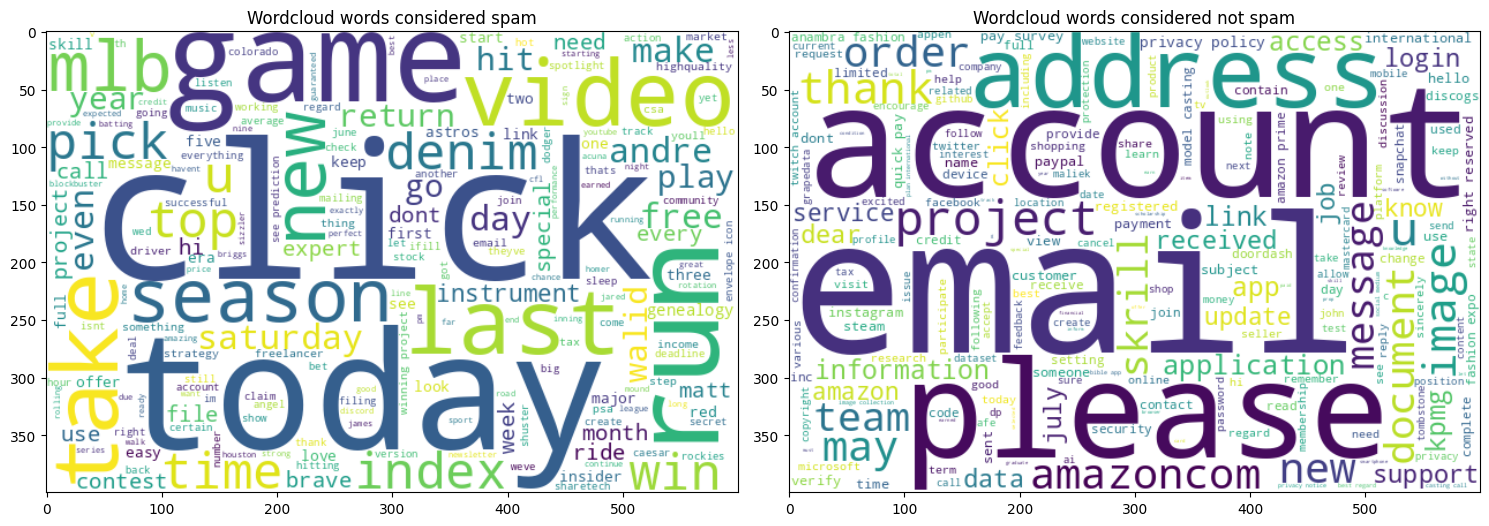

Frequently used words in spam email: 
[('click', 19), ('today', 14), ('game', 12), ('run', 11), ('get', 11), ('video', 9), ('last', 9), ('take', 9), ('season', 9), ('project', 9)]
Frequently used words in not spam email: 
[('email', 45), ('account', 36), ('please', 26), ('image', 21), ('address', 19), ('project', 19), ('u', 18), ('privacy', 16), ('may', 14), ('order', 14)]


In [ ]:
#EDA
#create a wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

combined_tokens = [title + text for title, text in zip(X_title_train, X_text_train)]
spam_title_text = [tokens for tokens, label in zip(combined_tokens, Y_train) if label == 1]
not_spam_title_text = [tokens for tokens, label in zip(combined_tokens, Y_train) if label == 0]

spam_word = ' '.join([' '.join(tokens) for tokens in spam_title_text])
not_spam_word = ' '.join([' '.join(tokens) for tokens in not_spam_title_text])

#wordcloud spam
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(spam_word), interpolation='bilinear')
plt.title("Wordcloud words considered spam")

#wordcloud not spam
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(not_spam_word), interpolation='bilinear')
plt.title("Wordcloud words considered not spam")

plt.tight_layout()
plt.show()

#see which are the top words in spam email and not spam email
from collections import Counter

#flatten the list of tokens in form of [[]] to list of strings in form of []
flatten_spam_words = [word for tokens in spam_title_text for word in tokens]
flatten_not_spam_words = [word for tokens in not_spam_title_text for word in tokens]

spam_word_count = Counter(flatten_spam_words)
not_spam_word_count = Counter(flatten_not_spam_words)

freq_spam_word = spam_word_count.most_common(10)
freq_nspam_word = not_spam_word_count.most_common(10)
print("Frequently used words in spam email: ")
print(freq_spam_word)
print("Frequently used words in not spam email: ")
print(freq_nspam_word)

In [ ]:
#before feeding the model with lemmatized words we need to combine it as one string
X_title_train_str = [' '.join(tokens) for tokens in X_title_train]
X_title_test_str = [' '.join(tokens) for tokens in X_title_test]
X_text_train_str = [' '.join(tokens) for tokens in X_text_train]
X_text_test_str = [' '.join(tokens) for tokens in X_text_test]

In [ ]:
#Modelling SVC for title classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import joblib

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(probability=True))
])

param_dist = {
    'tfidf__max_features': [2000,4000,10000,15000],
    'svm__C': [0.1, 0.5, 1,10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=3, random_state=42)

random_search.fit(X_title_train_str, Y_train)

print("Parameter: ", random_search.best_params_)
joblib.dump(random_search.best_estimator_, 'svc_title_best.pkl') #store the best model


Y_probs = random_search.predict_proba(X_title_test_str)
spam_probs = Y_probs[:, 1]
Y_pred = (spam_probs > 0.5).astype(int)
print(classification_report(Y_test, Y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameter:  {'tfidf__max_features': 2000, 'svm__kernel': 'rbf', 'svm__gamma': 'scale', 'svm__C': 10}
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.67      0.50      0.57         8

    accuracy                           0.77        26
   macro avg       0.73      0.69      0.71        26
weighted avg       0.76      0.77      0.76        26



In [ ]:
#Modelling SVC for text classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import joblib

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(probability=True))
])

param_dist = {
    'tfidf__max_features': [2000,4000,10000,15000],
    'svm__C': [0.1, 0.5, 1,10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=3, random_state=42)

random_search.fit(X_text_train_str, Y_train)

print("Parameter: ", random_search.best_params_)
joblib.dump(random_search.best_estimator_, 'svc_text_best.pkl') #store the best model


Y_probs = random_search.predict_proba(X_text_test_str)
spam_probs = Y_probs[:, 1]
Y_pred = (spam_probs > 0.5).astype(int)
print(classification_report(Y_test, Y_pred))
svc_text_probs = spam_probs

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameter:  {'tfidf__max_features': 10000, 'svm__kernel': 'linear', 'svm__gamma': 'auto', 'svm__C': 10}
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.75      0.38      0.50         8

    accuracy                           0.77        26
   macro avg       0.76      0.66      0.68        26
weighted avg       0.77      0.77      0.74        26



In [ ]:
#Modelling KNN Classifier for title classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import joblib

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

param_dist = {
    'tfidf__max_features': [2000,4000,10000,15000],
    'knn__n_neighbors': [3,5,7,9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=3, random_state=42)

random_search.fit(X_title_train_str, Y_train)

print("Parameter: ", random_search.best_params_)
joblib.dump(random_search.best_estimator_, 'knn_title_best.pkl') #store the best model


Y_probs = random_search.predict_proba(X_title_test_str)
spam_probs = Y_probs[:, 1]
Y_pred = (spam_probs > 0.5).astype(int)
print(classification_report(Y_test, Y_pred))
knn_title_probs = spam_probs

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameter:  {'tfidf__max_features': 4000, 'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'euclidean'}
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.80      0.50      0.62         8

    accuracy                           0.81        26
   macro avg       0.80      0.72      0.74        26
weighted avg       0.81      0.81      0.79        26



In [ ]:
#Modelling KNN Classifier for text classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import joblib

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

param_dist = {
    'tfidf__max_features': [2000,4000,10000,15000],
    'knn__n_neighbors': [3,5,7,9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=3, random_state=42)

random_search.fit(X_text_train_str, Y_train)

print("Parameter: ", random_search.best_params_)
joblib.dump(random_search.best_estimator_, 'knn_text_best.pkl') #store the best model


Y_probs = random_search.predict_proba(X_text_test_str)
spam_probs = Y_probs[:, 1]
Y_pred = (spam_probs > 0.5).astype(int)
print(classification_report(Y_test, Y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameter:  {'tfidf__max_features': 2000, 'knn__weights': 'uniform', 'knn__n_neighbors': 3, 'knn__metric': 'euclidean'}
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.75      0.38      0.50         8

    accuracy                           0.77        26
   macro avg       0.76      0.66      0.68        26
weighted avg       0.77      0.77      0.74        26



Title Accuracy


*   SVC: 0.77
*   KNN: 0.81

---


Text Accuracy

*   SVC: 0.77
*   KNN: 0.77


In [ ]:
#Evaluation
curr_accuracy = 0
best_title_proportion = 0
curr_y_pred = None

for w in np.arange(0.1, 1.0, 0.1):
  final_proportion = w * knn_title_probs + (1 - w) * svc_text_probs
  Y_pred = (final_proportion > 0.5).astype(int)
  new_accuracy = accuracy_score(Y_test, Y_pred)
  if new_accuracy > curr_accuracy:
    curr_accuracy = new_accuracy
    best_title_proportion = w
    curr_y_pred = Y_pred

print("Using SVC for classifying spam text and KNN for classifying spam title to classify a whole email as spam/not spam")
print(f"Best accuracy: {curr_accuracy:.3f} with title proportion {best_title_proportion:.3f} and text proportion {1-(best_title_proportion):.3f}")
print(classification_report(Y_test, curr_y_pred))

Using SVC for classifying spam text and KNN for classifying spam title to classify a whole email as spam/not spam
Best accuracy: 0.846 with title proportion 0.300 and text proportion 0.700
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.83      0.62      0.71         8

    accuracy                           0.85        26
   macro avg       0.84      0.78      0.80        26
weighted avg       0.84      0.85      0.84        26

